In [1]:
from compare_adversarial_lava import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
cnn = load_model("trained_models/classifier.h5")
# input shape: (28, 28, 1)

# Load models
cnn = load_model("trained_models/classifier.h5")
vae = VAE.load("trained_models")
cae = CAE.load("trained_models")
cvae = C_VAE.load("trained_models", model_name="cvae2")

models = [vae, cae, cvae]
adversarial_methods = ["vanilla_gradient", "gradient"] # ,"saliency"]

# Create LavaMultiSteps instances
lava_instances = {}
for model, prefix in zip(models, ["vae", "cae" ]):# ,"cvae"]):
    for method in adversarial_methods:
        key = f"lavam_{prefix}_{method[0]}"
        lava_instances[key] = LavaMultiSteps(cnn, model.encoder, model.decoder, 
                                             adversarial_method=method,
                                             verbose=True)

# Load input images
samples, sample_labels, sample_indices = load_samples_for_test(100, return_indices=True)
y_onehot = tf.one_hot(tf.constant(sample_labels), depth=10).numpy()


2024-06-18 13:51:07.236387: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-06-18 13:51:07.236592: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 13:51:07.237749: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


/home/congyu/anaconda3/envs/congyutf/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]2024-06-18 13:51:08.888719: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-06-18 13:51:08.905904: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz

lavam methods:  25%|██▌       | 1/4 [00:01<00:05,  1.83s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:02<00:03,  1.61s/it]

Misclassification achieved at iteration 1, inner iteration 2



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.61s/it]

Misclassification achieved at iteration 3, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:04<00:04,  2.35s/it]

Misclassification achieved at iteration 3, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:02<00:06,  2.17s/it]

Misclassification achieved at iteration 1, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:03<00:03,  1.80s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:04<00:13,  4.38s/it]

Misclassification achieved at iteration 4, inner iteration 4



lavam methods:  50%|█████     | 2/4 [00:06<00:07,  3.56s/it]

Misclassification achieved at iteration 4, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:04<00:14,  4.92s/it]

Misclassification achieved at iteration 4, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:07<00:08,  4.07s/it]

Misclassification achieved at iteration 4, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:01<00:05,  1.72s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:02<00:02,  1.48s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.51s/it]

Misclassification achieved at iteration 2, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:03<00:04,  2.18s/it]

Misclassification achieved at iteration 2, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:02<00:06,  2.27s/it]

Misclassification achieved at iteration 0, inner iteration 3



lavam methods:  50%|█████     | 2/4 [00:03<00:03,  1.86s/it]

Misclassification achieved at iteration 0, inner iteration 2



lavam methods:  75%|███████▌  | 3/4 [00:11<00:03,  3.72s/it]

Misclassification achieved at iteration 3, inner iteration 0



lavam methods: 100%|██████████| 4/4 [00:13<00:00,  3.25s/it]

Misclassification achieved at iteration 3, inner iteration 1


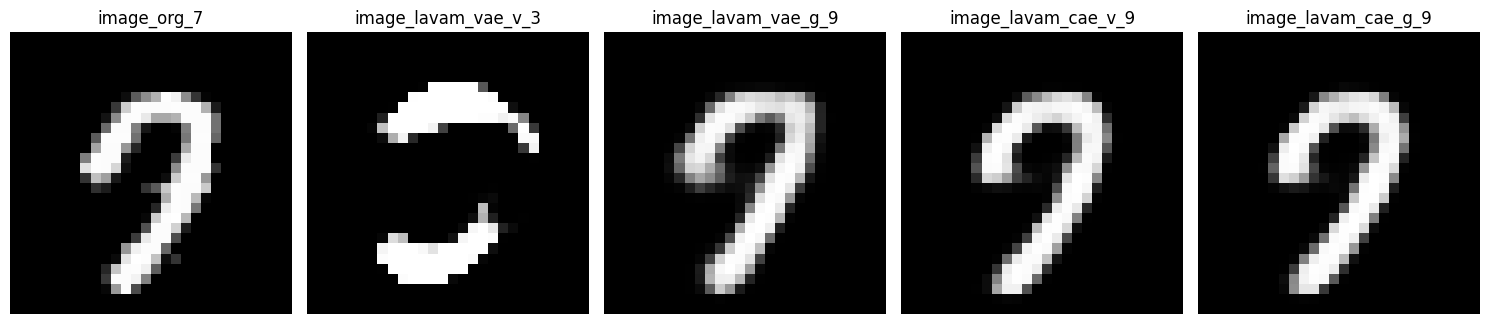

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 7.759322190595616
kl_lavam_vae_g: 0.12421518059803582
kl_lavam_cae_v: 0.10642615269978146
kl_lavam_cae_g: 0.09865438921411858
----------------------------------------------------------------
ws_lavam_vae_v: 0.00026392455264502633
ws_lavam_vae_g: 0.00017642097920671725
ws_lavam_cae_v: 7.649328159454385e-05
ws_lavam_cae_g: 9.372890237580045e-05
----------------------------------------------------------------
js_lavam_vae_v: 4.069981804516519
js_lavam_vae_g: 0.0843857233176653
js_lavam_cae_v: 0.08406466367491446
js_lavam_cae_g: 0.07691041788055274
----------------------------------------------------------------
mse_lavam_vae_v: 0.10977712149151819
mse_lavam_vae_g: 0.00882440802486597
mse_lavam_cae_v: 0.0062826899201740664
mse_lavam_cae_g: 0.005930749449857611
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:01<00:03,  1.03s/it]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.10it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:04<00:04,  2.15s/it]

Misclassification achieved at iteration 4, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:04<00:12,  4.30s/it]

Misclassification achieved at iteration 2, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:05<00:06,  3.28s/it]

Misclassification achieved at iteration 1, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:03<00:10,  3.42s/it]

Misclassification achieved at iteration 4, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:05<00:05,  2.90s/it]

Misclassification achieved at iteration 4, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.14it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.27it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:13<00:04,  4.13s/it]

Misclassification achieved at iteration 4, inner iteration 1



lavam methods: 100%|██████████| 4/4 [00:15<00:00,  3.81s/it]

Misclassification achieved at iteration 4, inner iteration 0


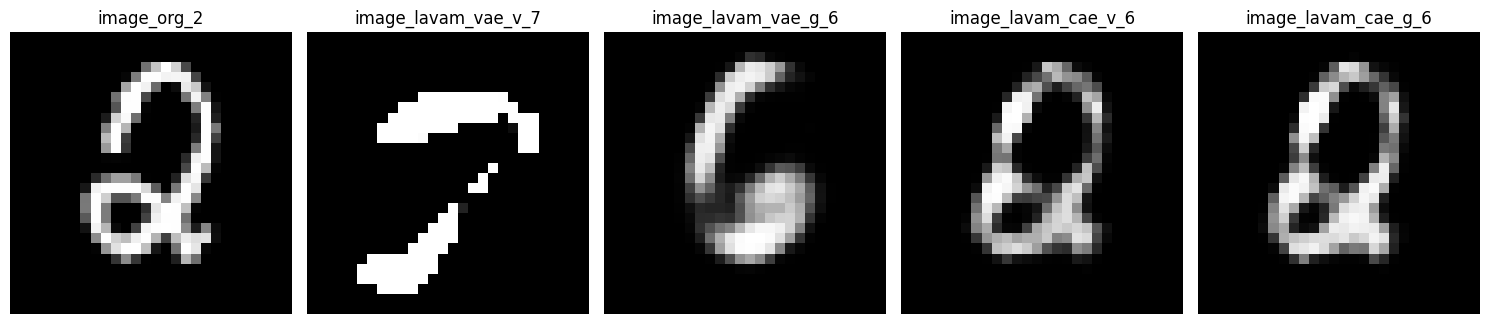

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 1.9486454459620381
kl_lavam_vae_g: 1.0661177322500839
kl_lavam_cae_v: 0.21037253627135621
kl_lavam_cae_g: 0.19040773333650052
----------------------------------------------------------------
ws_lavam_vae_v: 0.0003731493869129244
ws_lavam_vae_g: 0.0001335098274171779
ws_lavam_cae_v: 0.00013464751281573703
ws_lavam_cae_g: 0.00010128466718054395
----------------------------------------------------------------
js_lavam_vae_v: 1.1561638228515845
js_lavam_vae_g: 0.691287928867
js_lavam_cae_v: 0.1745369144565017
js_lavam_cae_g: 0.15268644009886578
----------------------------------------------------------------
mse_lavam_vae_v: 0.14921653854985054
mse_lavam_vae_g: 0.05193902273477456
mse_lavam_cae_v: 0.019776508924240217
mse_lavam_cae_g: 0.016622741582761186
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.17it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.28it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:08<00:02,  2.58s/it]

Misclassification achieved at iteration 2, inner iteration 0



lavam methods: 100%|██████████| 4/4 [00:09<00:00,  2.45s/it]

Misclassification achieved at iteration 2, inner iteration 1


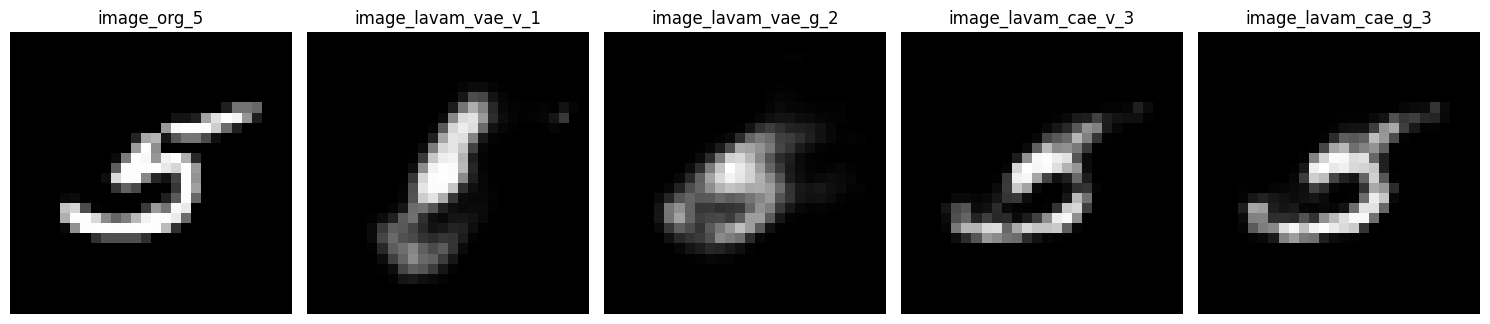

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 1.8468212259084718
kl_lavam_vae_g: 0.7053294309779707
kl_lavam_cae_v: 0.4681268613059801
kl_lavam_cae_g: 0.2728761602354627
----------------------------------------------------------------
ws_lavam_vae_v: 0.0003259751798281452
ws_lavam_vae_g: 0.0003748030443800261
ws_lavam_cae_v: 0.0002935203417245613
ws_lavam_cae_g: 0.00020261570933224622
----------------------------------------------------------------
js_lavam_vae_v: 1.0341287358210747
js_lavam_vae_g: 0.406527661834895
js_lavam_cae_v: 0.3273145149265988
js_lavam_cae_g: 0.17826326829585676
----------------------------------------------------------------
mse_lavam_vae_v: 0.05750325504283299
mse_lavam_vae_g: 0.033401151424181645
mse_lavam_cae_v: 0.02215358559916066
mse_lavam_cae_g: 0.01444643983038894
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:01<00:04,  1.38s/it]

Misclassification achieved at iteration 0, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:02<00:02,  1.21s/it]

Misclassification achieved at iteration 0, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.17it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.33it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:05<00:01,  1.82s/it]

Misclassification achieved at iteration 0, inner iteration 1



lavam methods: 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

Misclassification achieved at iteration 0, inner iteration 2


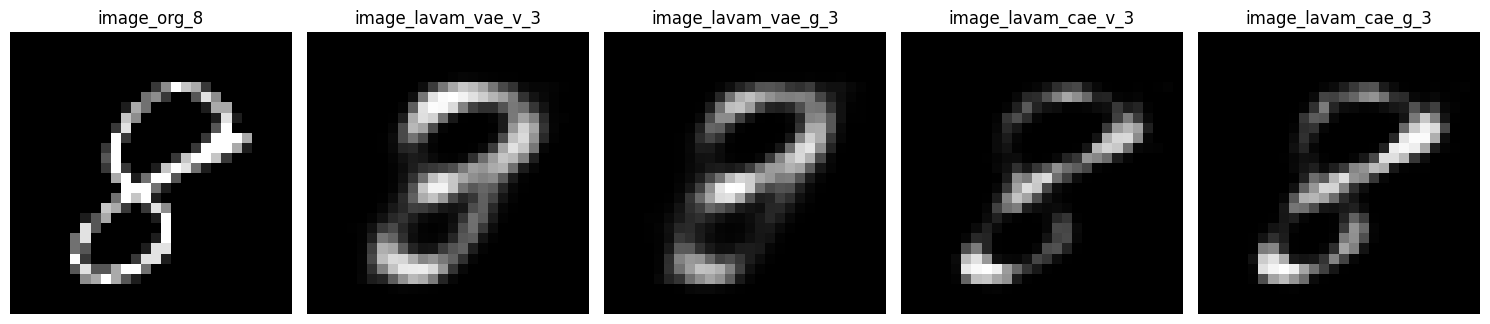

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 0.6538125496917792
kl_lavam_vae_g: 0.6971837055764337
kl_lavam_cae_v: 0.5590893784121838
kl_lavam_cae_g: 0.47849933246407406
----------------------------------------------------------------
ws_lavam_vae_v: 0.0006023981686856043
ws_lavam_vae_g: 0.0004991692074369081
ws_lavam_cae_v: 0.0003044363636114803
ws_lavam_cae_g: 0.00025888020817736924
----------------------------------------------------------------
js_lavam_vae_v: 0.29793453156637034
js_lavam_vae_g: 0.34867007171386655
js_lavam_cae_v: 0.34311164696084095
js_lavam_cae_g: 0.2658854446083457
----------------------------------------------------------------
mse_lavam_vae_v: 0.03603216326389616
mse_lavam_vae_g: 0.03181514417538876
mse_lavam_cae_v: 0.03187328914297464
mse_lavam_cae_g: 0.02682315333130373
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:02<00:06,  2.29s/it]

Misclassification achieved at iteration 0, inner iteration 3



lavam methods:  50%|█████     | 2/4 [00:03<00:03,  1.86s/it]

Misclassification achieved at iteration 1, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:13<00:04,  4.31s/it]

Misclassification achieved at iteration 2, inner iteration 3



lavam methods: 100%|██████████| 4/4 [00:15<00:00,  3.75s/it]

Misclassification achieved at iteration 2, inner iteration 2


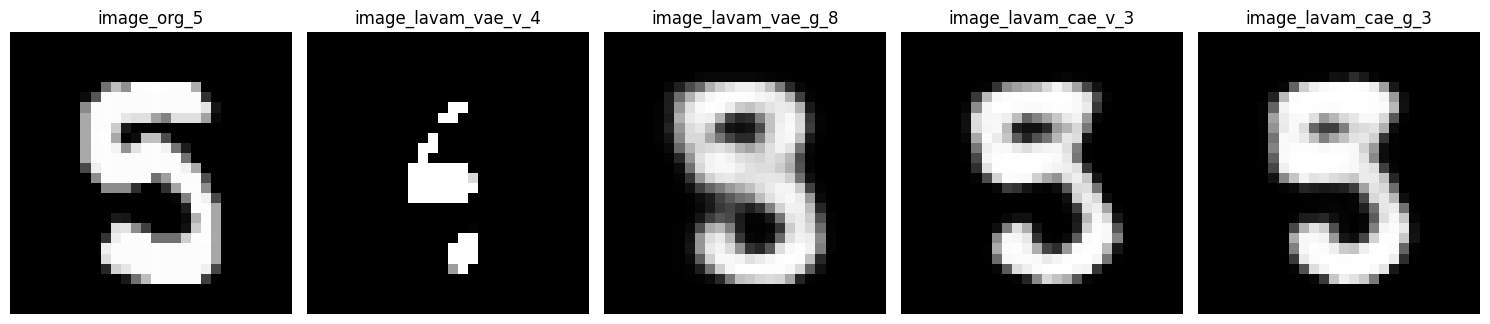

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 5.092845867332809
kl_lavam_vae_g: 0.25101330974888136
kl_lavam_cae_v: 0.17001499472221512
kl_lavam_cae_g: 0.1639817052655283
----------------------------------------------------------------
ws_lavam_vae_v: 0.0018377635034913956
ws_lavam_vae_g: 0.000259126852239428
ws_lavam_cae_v: 0.0001016314563558867
ws_lavam_cae_g: 9.370126656300805e-05
----------------------------------------------------------------
js_lavam_vae_v: 3.2055610391620677
js_lavam_vae_g: 0.11283715704059753
js_lavam_cae_v: 0.09801507712423824
js_lavam_cae_g: 0.08924177358207191
----------------------------------------------------------------
mse_lavam_vae_v: 0.16147578773178206
mse_lavam_vae_g: 0.03329929629206804
mse_lavam_cae_v: 0.019068838069882108
mse_lavam_cae_g: 0.018040389303400378
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.25it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.36it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.51s/it]

Misclassification achieved at iteration 2, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:03<00:03,  1.94s/it]

Misclassification achieved at iteration 1, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:03<00:09,  3.06s/it]

Misclassification achieved at iteration 4, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:02<00:06,  2.22s/it]

Misclassification achieved at iteration 2, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:03<00:04,  2.00s/it]

Misclassification achieved at iteration 2, inner iteration 2



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.40s/it]

Misclassification achieved at iteration 2, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:03<00:04,  2.11s/it]

Misclassification achieved at iteration 3, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:01<00:03,  1.00s/it]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.16it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:08<00:02,  2.77s/it]

Misclassification achieved at iteration 2, inner iteration 1



lavam methods: 100%|██████████| 4/4 [00:10<00:00,  2.53s/it]

Misclassification achieved at iteration 1, inner iteration 2


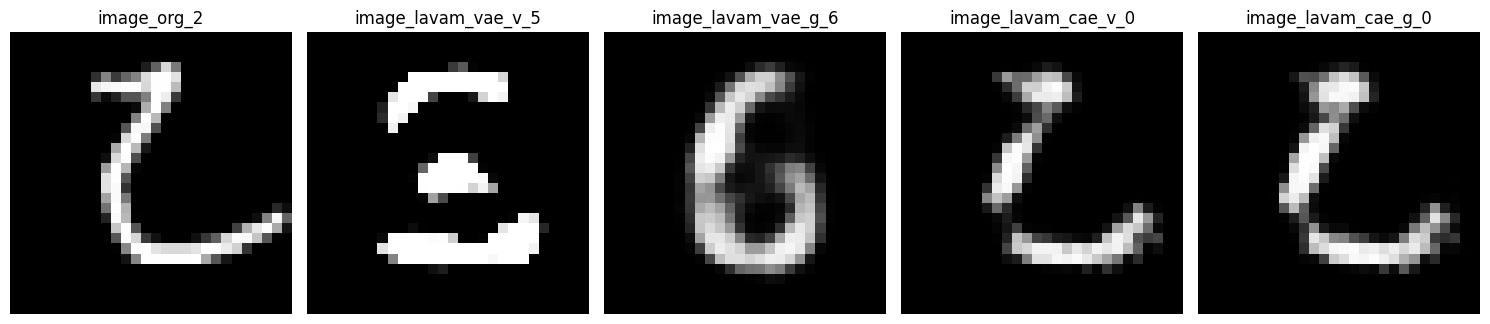

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 12.142814930098979
kl_lavam_vae_g: 2.6101950490588117
kl_lavam_cae_v: 0.7523702132538967
kl_lavam_cae_g: 0.7431540764357222
----------------------------------------------------------------
ws_lavam_vae_v: 0.00037231664006584557
ws_lavam_vae_g: 0.0005189395924496764
ws_lavam_cae_v: 0.00015778920349259864
ws_lavam_cae_g: 0.00010309384411923034
----------------------------------------------------------------
js_lavam_vae_v: 6.188356991998168
js_lavam_vae_g: 1.3440121726124035
js_lavam_cae_v: 0.47291697057308163
js_lavam_cae_g: 0.45852220447357905
----------------------------------------------------------------
mse_lavam_vae_v: 0.11600125248339463
mse_lavam_vae_g: 0.053386046027580604
mse_lavam_cae_v: 0.024184263990709984
mse_lavam_cae_g: 0.024168608268767457
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.40s/it]

Misclassification achieved at iteration 1, inner iteration 3



lavam methods:  50%|█████     | 2/4 [00:03<00:04,  2.02s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:01<00:05,  1.79s/it]

Misclassification achieved at iteration 0, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:02<00:03,  1.51s/it]

Misclassification achieved at iteration 0, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.29it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.39it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  75%|███████▌  | 3/4 [00:07<00:02,  2.26s/it]

Misclassification achieved at iteration 0, inner iteration 2



lavam methods: 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]

Misclassification achieved at iteration 0, inner iteration 2


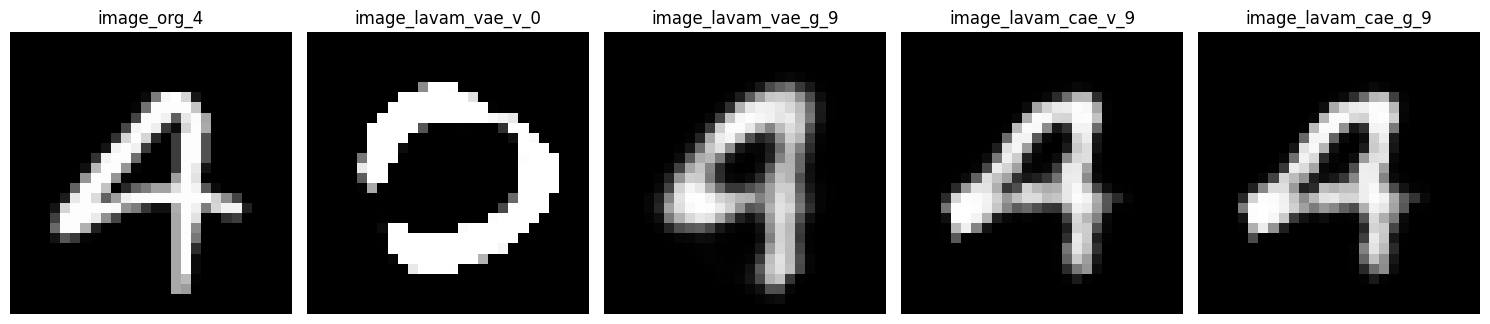

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 23.683176176811003
kl_lavam_vae_g: 0.4555823281027732
kl_lavam_cae_v: 0.3584252500337718
kl_lavam_cae_g: 0.34343659827180445
----------------------------------------------------------------
ws_lavam_vae_v: 0.0003780688728910737
ws_lavam_vae_g: 0.00028220942818092367
ws_lavam_cae_v: 9.097674602131617e-05
ws_lavam_cae_g: 8.533372496245539e-05
----------------------------------------------------------------
js_lavam_vae_v: 11.92879896457036
js_lavam_vae_g: 0.27122352586591764
js_lavam_cae_v: 0.251809804033056
js_lavam_cae_g: 0.2413023177496475
----------------------------------------------------------------
mse_lavam_vae_v: 0.22347231407666668
mse_lavam_vae_g: 0.02823148405915591
mse_lavam_cae_v: 0.020049938982102177
mse_lavam_cae_g: 0.019711545410824444
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:03<00:09,  3.05s/it]

Misclassification achieved at iteration 3, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:04<00:05,  2.64s/it]

Misclassification achieved at iteration 3, inner iteration 2



lavam methods:  25%|██▌       | 1/4 [00:03<00:10,  3.49s/it]

Misclassification achieved at iteration 3, inner iteration 3



lavam methods:  50%|█████     | 2/4 [00:04<00:05,  2.80s/it]

Misclassification achieved at iteration 3, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:01<00:03,  1.08s/it]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:02,  1.03s/it]

Misclassification achieved at iteration 0, inner iteration 1



lavam methods:  75%|███████▌  | 3/4 [00:09<00:02,  2.89s/it]

Misclassification achieved at iteration 3, inner iteration 0



lavam methods: 100%|██████████| 4/4 [00:10<00:00,  2.68s/it]

Misclassification achieved at iteration 3, inner iteration 0


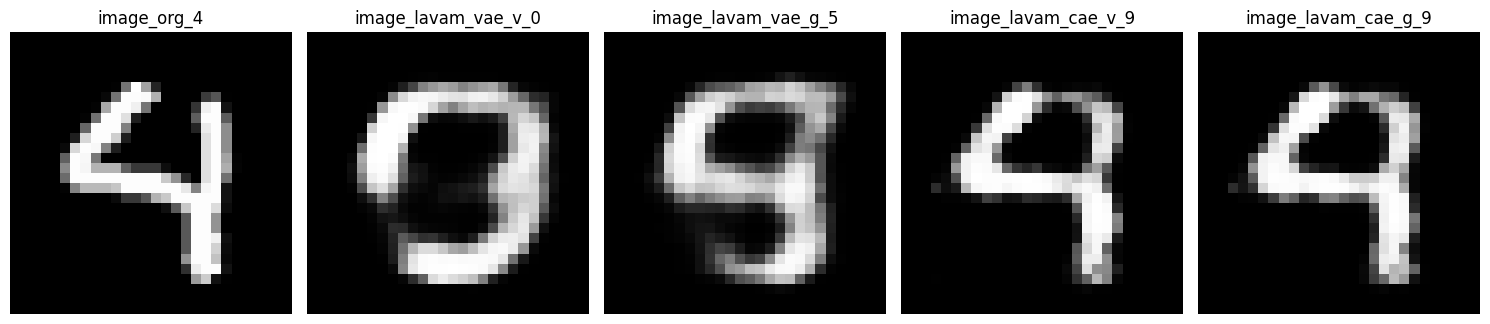

lavam methods:   0%|          | 0/4 [00:00<?, ?it/s]

kl_lavam_vae_v: 1.1446597724037768
kl_lavam_vae_g: 0.44487987205334356
kl_lavam_cae_v: 0.2252826029252163
kl_lavam_cae_g: 0.1864405265856961
----------------------------------------------------------------
ws_lavam_vae_v: 0.0006031889579564962
ws_lavam_vae_g: 0.0006233274157237333
ws_lavam_cae_v: 7.31406053514781e-05
ws_lavam_cae_g: 0.0001227183999916277
----------------------------------------------------------------
js_lavam_vae_v: 0.6003292044014369
js_lavam_vae_g: 0.21143720709371217
js_lavam_cae_v: 0.13309730159557565
js_lavam_cae_g: 0.10194605754354491
----------------------------------------------------------------
mse_lavam_vae_v: 0.1051013890753773
mse_lavam_vae_g: 0.041781647653686194
mse_lavam_cae_v: 0.016751684933099847
mse_lavam_cae_g: 0.015307467192872575
----------------------------------------------------------------



lavam methods:  25%|██▌       | 1/4 [00:01<00:03,  1.25s/it]

Misclassification achieved at iteration 1, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:02,  1.03s/it]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:02<00:08,  2.80s/it]

Misclassification achieved at iteration 1, inner iteration 4



lavam methods:  50%|█████     | 2/4 [00:04<00:04,  2.35s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:01<00:04,  1.42s/it]

Misclassification achieved at iteration 1, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:02<00:02,  1.25s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.05it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.20it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:01<00:05,  1.75s/it]

Misclassification achieved at iteration 1, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:02<00:03,  1.57s/it]

Misclassification achieved at iteration 2, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:00<00:02,  1.09it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  50%|█████     | 2/4 [00:01<00:01,  1.25it/s]

Misclassification achieved at iteration 0, inner iteration 0



lavam methods:  25%|██▌       | 1/4 [00:02<00:07,  2.62s/it]

Misclassification achieved at iteration 3, inner iteration 1



lavam methods:  50%|█████     | 2/4 [00:04<00:04,  2.38s/it]

Misclassification achieved at iteration 3, inner iteration 2



lavam methods:  50%|█████     | 2/4 [00:03<00:03,  1.90s/it]

Misclassification achieved at iteration 4, inner iteration 0



samples: 100%|██████████| 100/100 [21:12<00:00, 12.72s/it]


In [5]:
tf.keras.backend.set_learning_phase(0)

predicted_labels_list = []
results = []
# Start experiment
for i in tqdm(range(len(samples)), desc="samples"):
    result = dict()
    result["index"] = i
    result["index_in_dataset"] = sample_indices[i]

    image_org, label_org = samples[i], sample_labels[i]

    # Generate adversarial images
    adversarial_images = {}
    for key, lava in tqdm(lava_instances.items(), desc="lavam methods"):
        start = time.time()
        image = lava.generate_adversarial_image(image_org, y_onehot[i], alpha=0.5, num_iterations=5)[0]
        end = time.time()
        result[f"t_{key}"] = end - start
        adversarial_images.update({key: image})

    # Predict labels for adversarial images
    predicted_labels = {
        key: np.argmax(cnn.predict(np.array([img]))[0])
        for key, img in adversarial_images.items()
    }
    predicted_labels_list.append(predicted_labels)

    # Plot the images if original label differs from all adversarial labels
    if label_org not in predicted_labels.values():
        images = [image_org] + list(adversarial_images.values())
        labels = [label_org] + list(predicted_labels.values())
        markers = ["org"] + list(adversarial_images.keys())
        plot_image_comparison(images, labels, markers)

        # In image space
        divergence_functions = {
            "kl": kl_divergence,
            "ws": ws_distance,
            "js": js_divergence,
            "mse": mse_loss,
            # "xentropy", cross_entropy,
        }

        for name, func in divergence_functions.items():
            divergences = {key: func(image_org, img) for key, img in adversarial_images.items()}
            for key, value in divergences.items():
                result[f"{name}_{key}"] = value
                print(f"{name}_{key}: {value}")
            print("-" * 64)

        results.append(result)

        """
        # In latent space
        h = vae.encoder.predict([np.reshape([image_org], (784, ))])[0]
        latent_h = {
            key: vae.encoder.predict([np.reshape([img], (784, ))])[0]
            for key, img in adversarial_images.items()
        }
        latent_h["lava"] = h_lava  # Use h_lava directly for lava

        distances = {
            key: np.linalg.norm(h - latent_h[key])
            for key in latent_h.keys()
        }

        for key, dist in distances.items():
            print(f"d_{key}: {dist}")
        """

In [6]:
# Calculate success ratios
success_ratios = calculate_success_ratio(predicted_labels_list, sample_labels)

# Print or return the success ratios
print(success_ratios)

results_df = pd.DataFrame(results)


{'lavam_vae_v': 0.35, 'lavam_vae_g': 0.36, 'lavam_cae_v': 0.08, 'lavam_cae_g': 0.08}


In [7]:
results_df

,index,index_in_dataset,t_lavam_vae_v,t_lavam_vae_g,t_lavam_cae_v,t_lavam_cae_g,kl_lavam_vae_v,kl_lavam_vae_g,kl_lavam_cae_v,kl_lavam_cae_g,...,ws_lavam_cae_v,ws_lavam_cae_g,js_lavam_vae_v,js_lavam_vae_g,js_lavam_cae_v,js_lavam_cae_g,mse_lavam_vae_v,mse_lavam_vae_g,mse_lavam_cae_v,mse_lavam_cae_g
0,10,9534,2.272869,0.894057,8.041302,1.780850,7.759322,0.124215,0.106426,0.098654,...,0.000076,0.000094,4.069982,0.084386,0.084065,0.076910,0.109777,0.008824,0.006283,0.005931
1,22,1642,0.879385,0.568395,11.917893,1.859899,1.948645,1.066118,0.210373,0.190408,...,0.000135,0.000101,1.156164,0.691288,0.174537,0.152686,0.149217,0.051939,0.019777,0.016623
2,27,7541,0.857981,0.578303,6.755707,1.562024,1.846821,0.705329,0.468127,0.272876,...,0.000294,0.000203,1.034129,0.406528,0.327315,0.178263,0.057503,0.033401,0.022154,0.014446
3,39,4096,0.856333,0.502050,4.299418,0.990253,0.653813,0.697184,0.559089,0.478499,...,0.000304,0.000259,0.297935,0.348670,0.343112,0.265885,0.036032,0.031815,0.031873,0.026823
4,40,5947,2.292071,0.842777,10.031369,1.812568,5.092846,0.251013,0.170015,0.163982,...,0.000102,0.000094,3.205561,0.112837,0.098015,0.089242,0.161476,0.033299,0.019069,0.018040
5,58,3384,1.000077,0.518828,7.231324,1.322423,12.142815,2.610195,0.752370,0.743154,...,0.000158,0.000103,6.188357,1.344012,0.472917,0.458522,0.116001,0.053386,0.024184,0.024169
6,62,1956,0.774242,0.592059,5.843904,1.085862,23.683176,0.455582,0.358425,0.343437,...,0.000091,0.000085,11.928799,0.271224,0.251810,0.241302,0.223472,0.028231,0.020050,0.019712
7,73,3172,1.079305,0.896278,7.249582,1.500080,1.144660,0.444880,0.225283,0.186441,...,0.000073,0.000123,0.600329,0.211437,0.133097,0.101946,0.105101,0.041782,0.016752,0.015307
